# Problem Formulation

As grocery costs continue to rise, those trying to maintain a healthy diet might find it increasingly more difficult to balance the nutritional value of a food against its price. By using usda nutritional information and grocery chain pricing data, we aim to provide a standardized way to compare the nutritional value of common grocery store products across several different brands. Several factors such as the brand, price, type of food, geographical location, and grocery store will be used to create a nutritient vs price ratio that can be used to identify which brands, grocery stores, or other metrics are the most cost effective way of maintaining a healthy diet with a proper intake of nutrients.

# Data Acquisition & Documentation

See 'Data Dictionary.pdf'

# Database Schema & Implementation

See 'Database Schema.png'
To generate, see the README section 'Generating DB'

# Data Exploration

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Connect to the database
conn = sqlite3.connect("./data/nutrition.db")
cur = conn.cursor()

In [13]:
# Check null values
df = pd.read_sql_query("SELECT * FROM food", conn)
print(df.isna().sum())

# Drop entries with null descriptions (product name)
cur.execute("""
            DELETE FROM food
            WHERE description IS NULL
            """)
conn.commit()

fdc_id                    0
description               0
publication_date          0
brand_owner            5361
brand_name            96194
subbrand_name        564211
gtin_upc                  0
serving_size           7855
serving_size_unit      7856
market_country            0
dtype: int64


Without product descriptions, we are unable to compare to price datasets and thus those rows are unusable. Other rows are either unimportant or unecessary for some comparisons, but rows with null values might be excluded in some future direct comparisons.

In [3]:
# Check null values
df = pd.read_sql_query("SELECT * FROM food_nutrient", conn)
df.isna().sum()

id             0
fdc_id         0
nutrient_id    0
amount         0
dtype: int64

The nutrient dataset seems to not have any null values which is quite useful for future uses.

In [25]:
# Check null values
df = pd.read_sql_query("SELECT * FROM nutrient", conn)
df.isna().sum()

id               0
name             0
unit_name        0
nutrient_nbr    12
rank            11
dtype: int64

In [14]:
# Check null values
df = pd.read_sql_query("SELECT * FROM walmart_price", conn)
print(df.isna().sum())

# Drop entries with null descriptions (product name)
cur.execute("""
            DELETE FROM walmart_price
            WHERE brand IS NULL
            """)
conn.commit()

shipping_location         0
department                0
category                  0
subcategory          207210
sku                       0
product_name              0
brand                     0
price_retail              0
product_size          62798
dtype: int64


Subcategory and product_size are unecessary for many products and comparisons and thus null values can be ignored for now. Missing brand names could be a problem when comparing product names to other datasets and there appeared to be very few null brand names so those rows were dropped.

In [15]:
# Check null values
df = pd.read_sql_query("SELECT * FROM wholefoods_price", conn)
print(df.isna().sum())

# Drop entries with null prices
cur.execute("""
            DELETE FROM wholefoods_price
            WHERE price IS NULL
            """)
conn.commit()

zip_code        0
brand           0
product_name    0
price           0
dtype: int64


A small amount of price values were null, so those rows had to be dropped as price is the main comparison variable.

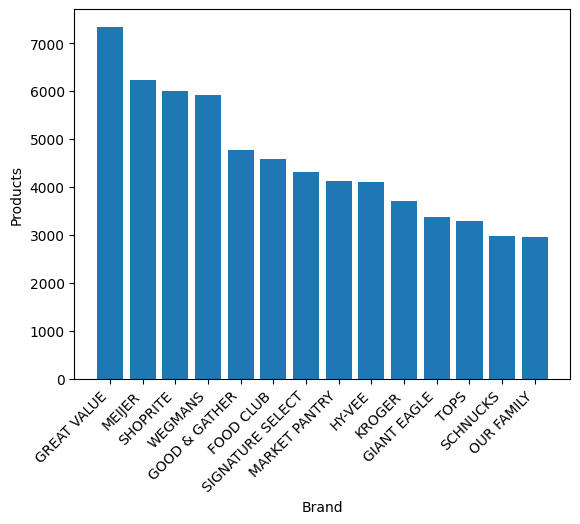

In [16]:
# Get the top 15 brands in the food table and graph
df = pd.read_sql_query("""
                       SELECT brand_name, COUNT(*) as brand_count 
                       FROM food 
                       GROUP BY brand_name
                       ORDER BY brand_count DESC
                       LIMIT 15
                       """, conn)
df = df.dropna()

plt.bar(x=df.brand_name, height=df.brand_count, width=0.8)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Products")
plt.xlabel("Brand")
plt.show()

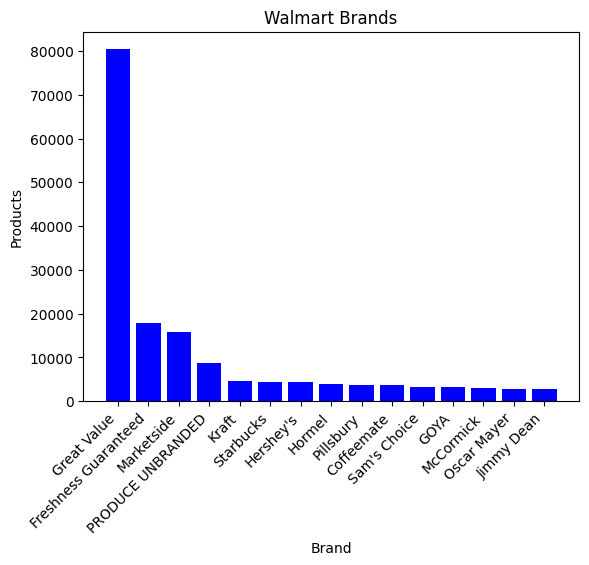

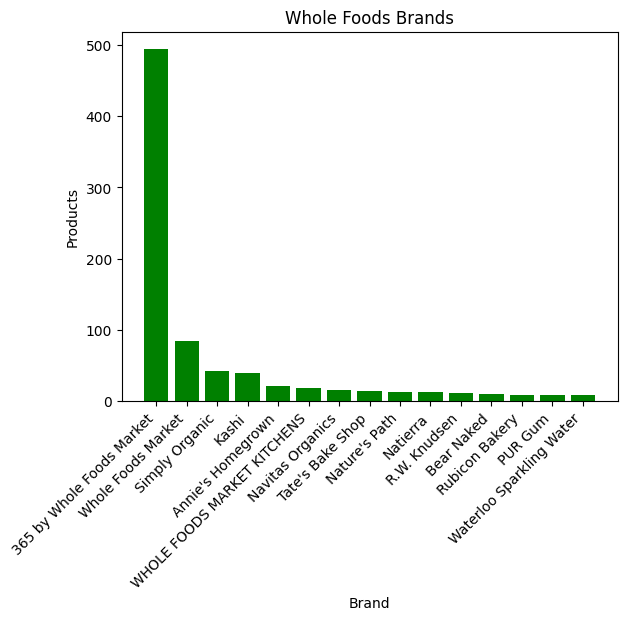

In [17]:
# Get the top 15 brands in the price tables and graph
df = pd.read_sql_query("""
                       SELECT brand, COUNT(*) as brand_count 
                       FROM walmart_price 
                       GROUP BY brand
                       ORDER BY brand_count DESC
                       LIMIT 15
                       """, conn)

plt.figure()
plt.bar(df.brand, df.brand_count, width=0.8, color='blue')
plt.title("Walmart Brands")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Products")
plt.xlabel("Brand")
plt.show()

df = pd.read_sql_query("""
                       SELECT brand, COUNT(*) as brand_count 
                       FROM wholefoods_price 
                       GROUP BY brand
                       ORDER BY brand_count DESC
                       LIMIT 15
                       """, conn)

plt.figure()
plt.bar(df.brand, df.brand_count, width=0.8, color='green')
plt.title("Whole Foods Brands")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Products")
plt.xlabel("Brand")
plt.show()

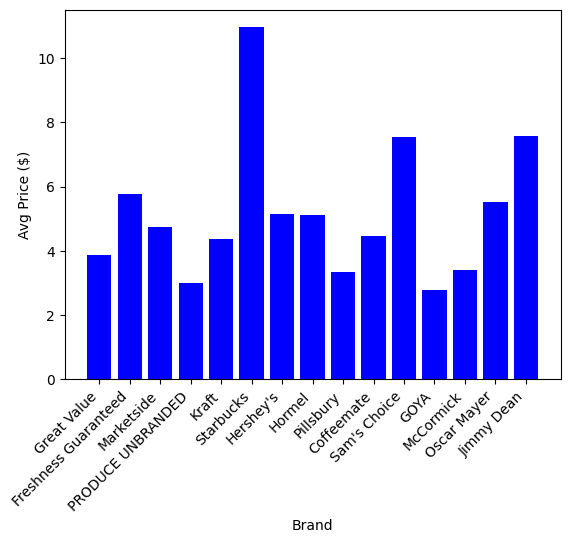

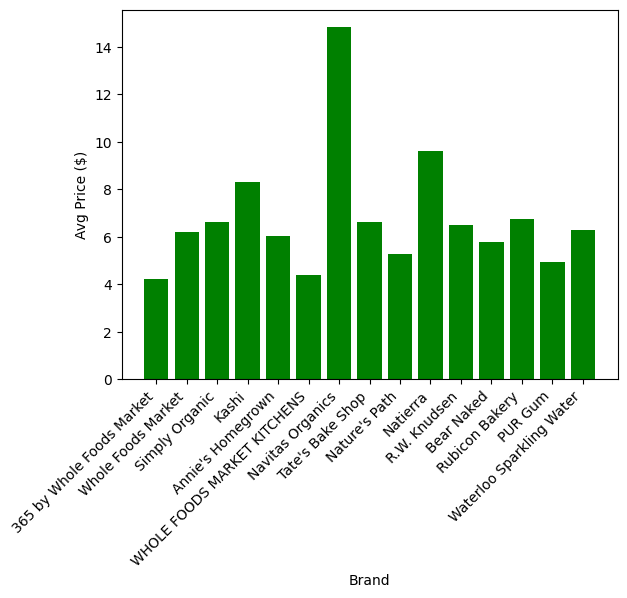

In [18]:
# Get the top 15 brands in the price tables and graph the avg price across the brand
df = pd.read_sql_query("""
                       SELECT brand, AVG(price_retail) as avg_pric, COUNT(*) as brand_count 
                       FROM walmart_price 
                       GROUP BY brand
                       ORDER BY brand_count DESC
                       LIMIT 15
                       """, conn)

plt.figure()
plt.bar(x=df.brand, height=df.avg_pric, width=0.8, color='blue')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Avg Price ($)")
plt.xlabel("Brand")
plt.show()

df = pd.read_sql_query("""
                       SELECT brand, AVG(price) as avg_pric, COUNT(*) as brand_count 
                       FROM wholefoods_price 
                       GROUP BY brand
                       ORDER BY brand_count DESC
                       LIMIT 15
                       """, conn)

plt.figure()
plt.bar(x=df.brand, height=df.avg_pric, width=0.8, color='green')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Avg Price ($)")
plt.xlabel("Brand")
plt.show()

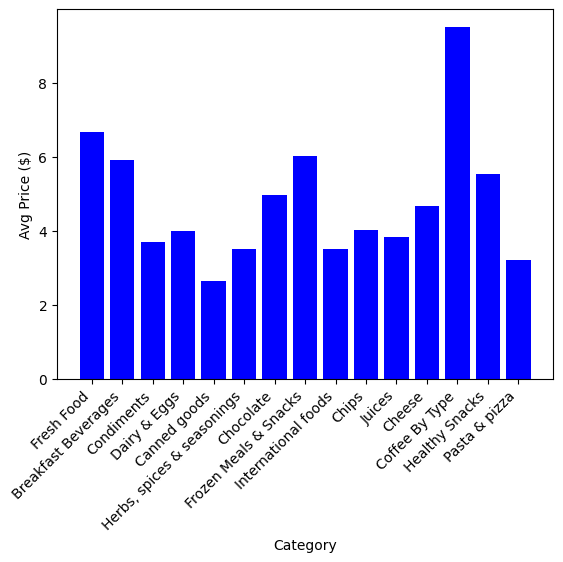

In [19]:
# Get the top 15 categories in the walmart table and graph the avg price
df = pd.read_sql_query("""
                       SELECT category, AVG(price_retail) as avg_pric, COUNT(*) as cat_count 
                       FROM walmart_price 
                       GROUP BY category
                       ORDER BY cat_count DESC
                       LIMIT 15
                       """, conn)

plt.bar(x=df.category, height=df.avg_pric, width=0.8, color='blue')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Avg Price ($)")
plt.xlabel("Category")
plt.show()

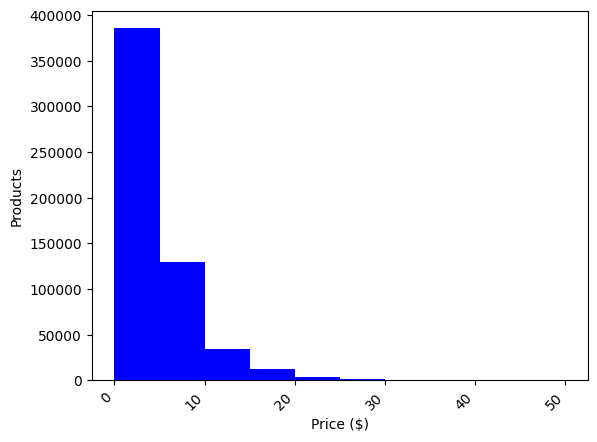

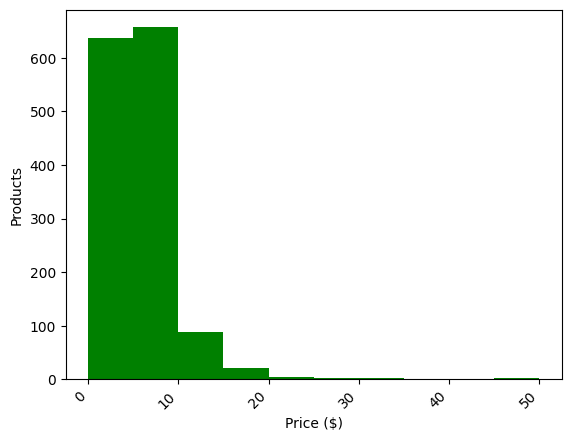

In [24]:
# Graph price ranges in both datasets
df = pd.read_sql_query("""
                       SELECT price_retail
                       FROM walmart_price
                       """, conn)

plt.figure()
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
plt.hist(df, bins, color='blue')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Products")
plt.xlabel("Price ($)")
plt.show()

df = pd.read_sql_query("""
                       SELECT price
                       FROM wholefoods_price
                       """, conn)

plt.figure()
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
plt.hist(df, bins, color='green')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Products")
plt.xlabel("Price ($)")
plt.show()

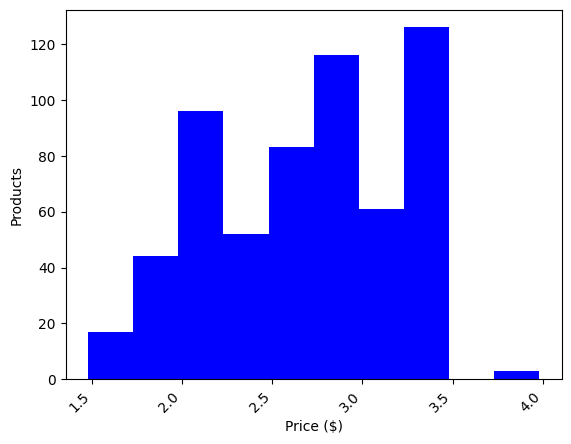

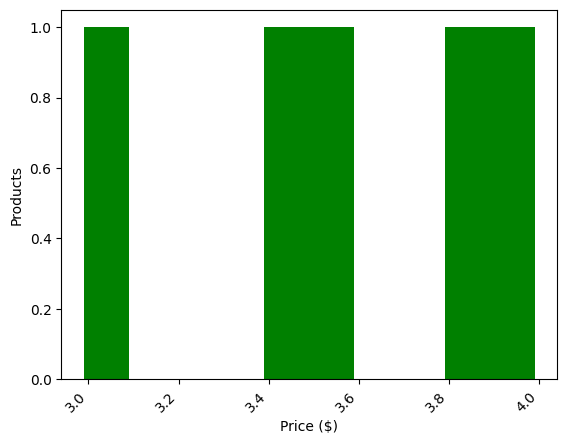

In [28]:
# Graph price ranges for lettuce in both datasets
df = pd.read_sql_query("""
                       SELECT price_retail
                       FROM walmart_price
                       WHERE product_name LIKE "%lettuce%"
                       """, conn)

plt.figure()
plt.hist(df, color='blue')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Products")
plt.xlabel("Price ($)")
plt.show()

df = pd.read_sql_query("""
                       SELECT price
                       FROM wholefoods_price
                       WHERE product_name LIKE "%lettuce%"
                       """, conn)

plt.figure()
plt.hist(df, color='green')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Products")
plt.xlabel("Price ($)")
plt.show()

In [10]:
conn.close()